In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas,scikit-learn

E. Kaan Ulgen 

numpy 1.16.2
scipy 1.2.0
matplotlib 3.1.0
pandas 1.0.4
sklearn 0.23.2


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_circles

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

from IPython.display import Image
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Destek Vektör Makineleri

- Temelleri Vladimir Vapnik ve Alexey Chervonenkis tarafından hesaplabilir öğrenme teorisinin önemli bir kısmını oluşturan ve öğrenmenin temel teorisi olarak bilinen Vapnik-Chervonenkis teorisine dayanmaktadır.
- Destek Vektör Makineleri (DVM) 1992 yılında Vladimir Vapnik, Berhard Boser ve Isabelle Guyon tarafından sunulmuştur. 1990'lı yılların sonuna doğru yaygın olarak kullanılmaya başlamıştır

### Genel Özellikler
- Destek Vektör Makineleri (DVM), başlangıçta iki sınıflı doğrusal verilerin sınıflandırılması problemi için tasarlanmış, daha sonra çok sınıflı ve doğrusal olmayan verilerin sınıflandırılması için genelleştirilmiştir.
- DVM temelde iki sınıfı birbirinden ayırabilen en uygun karar fonksiyonun tahmin edilmesi veya iki sınıfı birbirinden en uygun şekilde ayırabilen hiper-düzlemin tanımlanmasına dayanmaktadır  (Vapnik, 1995; Vapnik, 2000; Kavzoğlu, 2010).
- DVM, el yazısı tanıma, zaman serisi analiz, konuşma tanıma, örüntü tanıma gibi sınıflandırma problemlerinin birçoğunda başarı ile uygulanmıştır. 
- DVM, dış bükey optimizasyona dayalı bir algoritmadır. 
- Doğrusal olmayan bir eşlem ile n boyutlu veri kümesi k > n olacak şekilde k boyutlu yeni bir veri kümesine dönüştürülür.
- DVM ile yüksek boyutta doğrusal sınıflandırma işlemi yapılır.
- Hiper düzleme en yakın öğrenme verileri destek vektörleri (veya destek noktaları) olarak adlandırılır.
- Destek noktaları arasındaki genişlik, margin olarak adlandırılır. DVM, desktek noktaları arasındaki genişliği maksimize etmeyi amaçlayan bir denetimli öğrenme algoritmasıdır.

### Algoritmanın Avantajları:
- Karmaşık karar sınırları modellenebiliyor.
- Çok sayıda bağımsız değişkenle çalışabilmektedir.
- Hem doğrusal olarak ayrılan verilere hem de ayrılamayanlara uygulanabilmektedir.
- Aşırı uyum sorunu, diğer birçok yönteme göre daha azdır (Bilgin, 2018).


- DVM algoritması, problemleri temelde 3 başlık altında incelemektedir:
    - Verileri doğrusal olarak ayrılabilenler
    - Verileri doğrusal olarak ayrılamayanlar ve
    - Çoklu sınıf problemleri

### Doğrusal Destek Vektör Makineleri

- İki sınıflı bir veri setine sahip olalım. 
- DVM algoritması kullanılarak bu iki sınıfa ait örneklerin, eğitim verisi ile elde edilen bir karar fonksiyonu yardımıyla birbirinden ayrılması amaçlanır. 
- Karar fonksiyonu kullanılarak eğitim verisini en uygun şekilde ayırabilecek hiperdüzlem bulunur. 
- Bu hayali veri setimiz 2 boyutlu olduğu için hiperdüzlem yerine karar doğrusu veya çizgisi gibi ifadeleride kullanabiliriz.

$$(x_i, y_i) => i=1,2,...,n$$

$$x_i= Özniteliklerden \ oluşan \ bir \ vektör.$$

$$x_i \in \mathbb{R}^{p} $$

$$y_i \in \{-1,1\}$$ 

$$ \{x\in \mathbb{R}^{p}: \beta^Tx_i + \beta_0 =0, \beta \in \mathbb{R}^{p}, \beta_0 \in \mathbb{R} \}$$

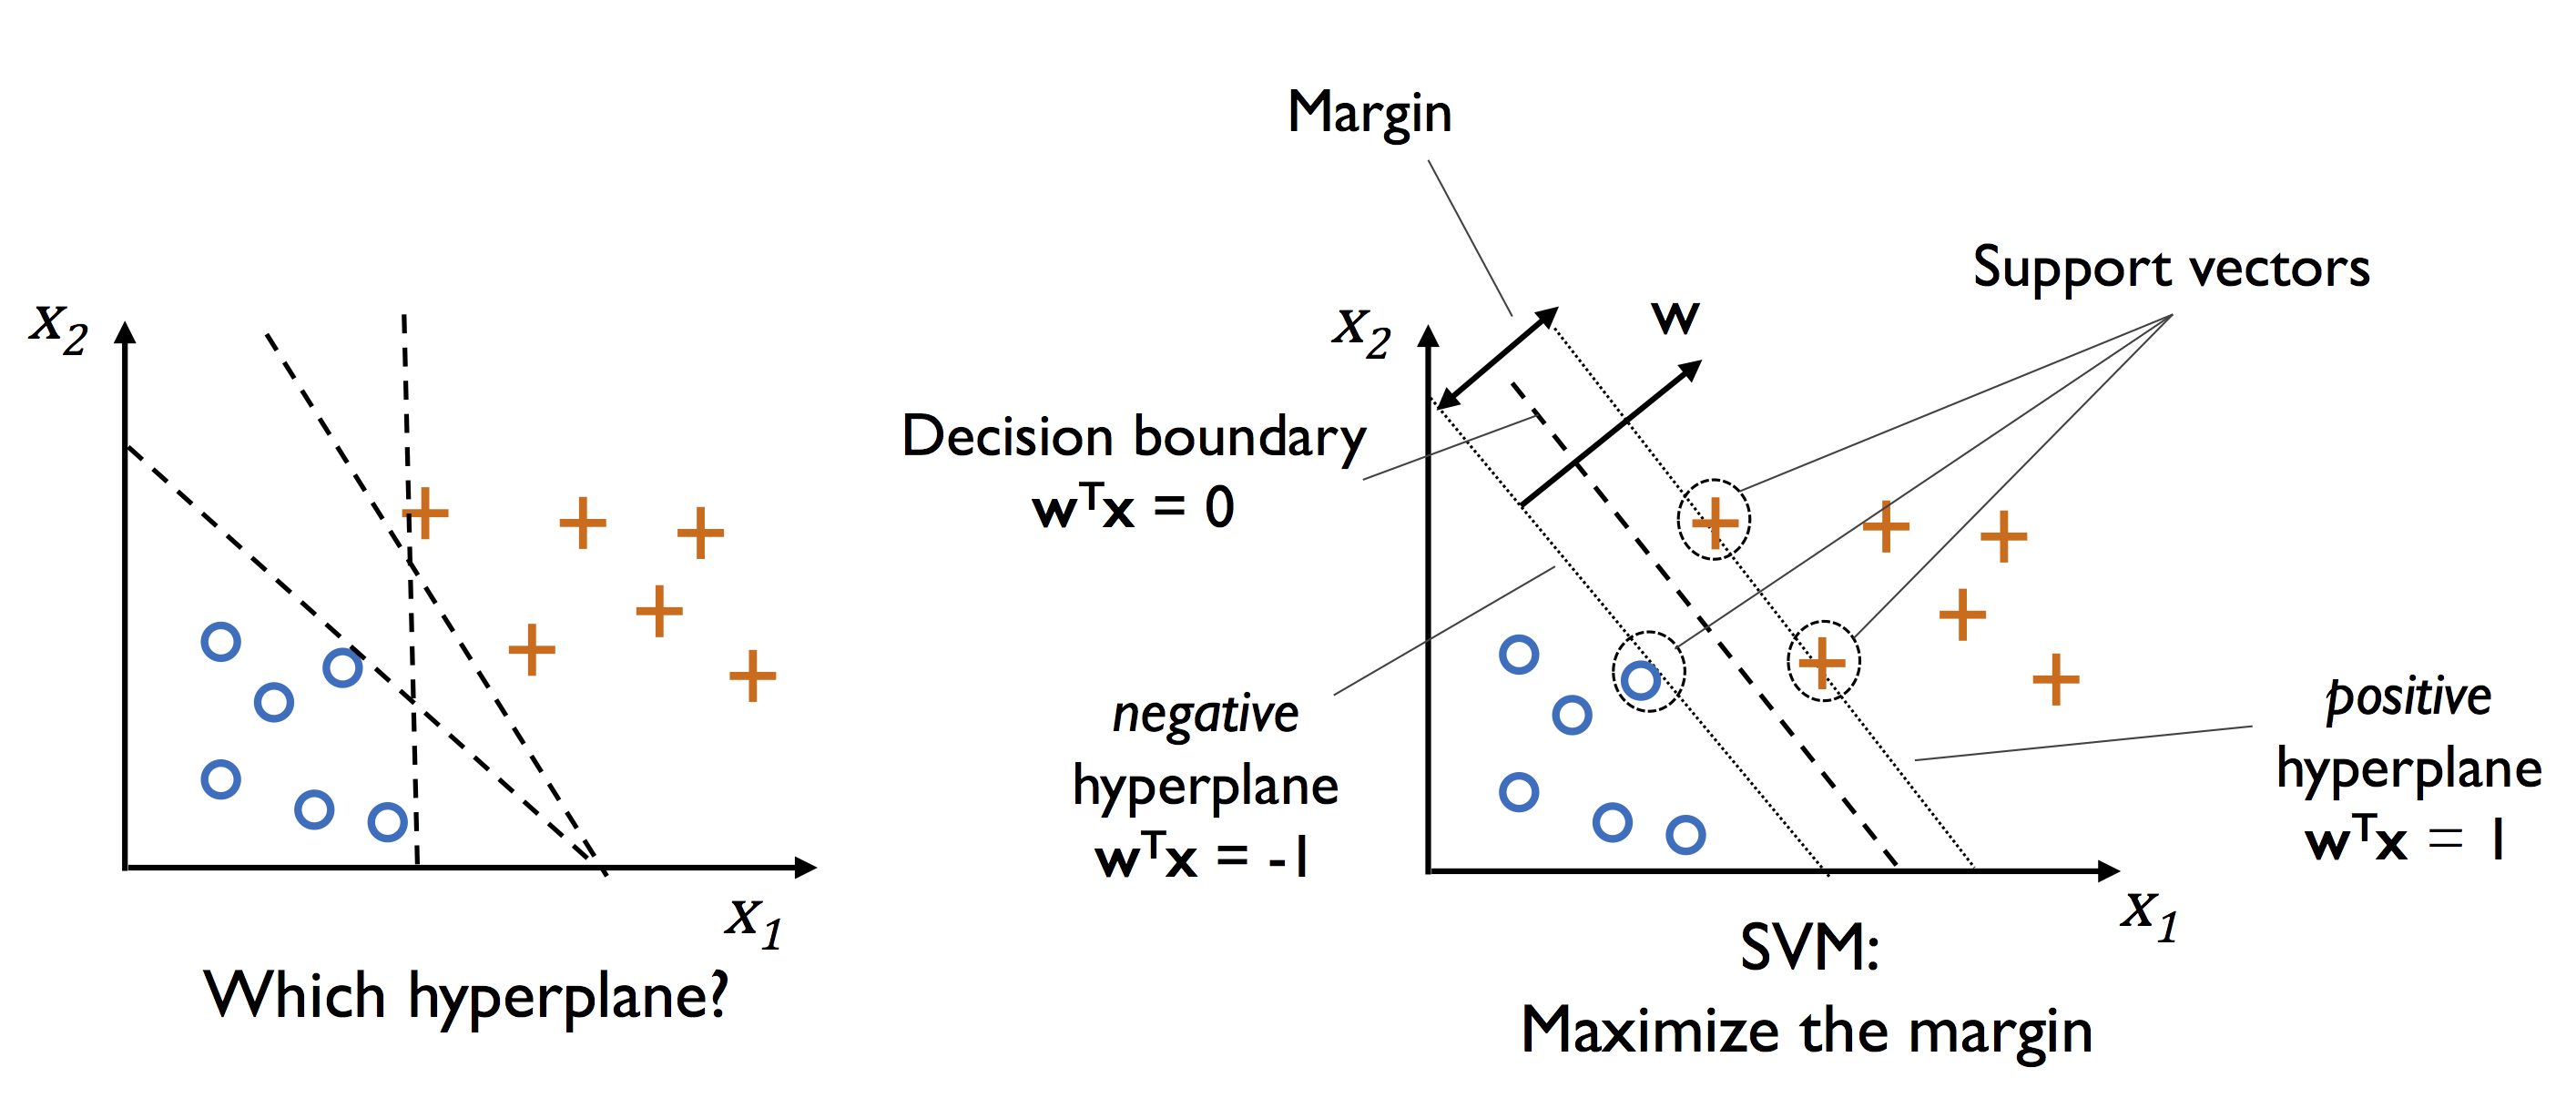

In [4]:
Image(filename='./03_09_svm.png', width=700)

- Farklı bir çok düzlem kullanarak bu iki sınıfı ayırabiliriz. Amacımız bu düzlemlerden en uygun olanı bulmak.
- Yani DVM’nin amacı kendisine en yakın noktalar arasındaki uzaklığı maksimuma çıkaran hiper-düzlemi bulabilmektir. 
- Sınır düzlemlerine, optimum hiper-düzlem ve sınır genişliğini sınırlandıran noktalara ise destek vektörleri denir.  Düzlemin nereden geçeceğini belirleyen bu vektörler aslında girdi verilerimizdir (Girdi Vektörü).

$$ \beta^Tx_i + \beta_0 - \Delta = 0 $$

$$ \beta^Tx_i + \beta_0 + \Delta = 0 $$

$ \Delta$ = Düzlemi veya doğruyu ne kadar kaydıracağımızı belirliyor.


$ \Delta$'yı belirleyen sınır noktaları: 

$ y_i = 1$ için 

$$ \beta^Tx_i + \beta_0 \geq \Delta $$

$ y_i = -1$ için 

$$ \beta^Tx_i + \beta_0 \leq \Delta $$

- Kolaylık olması için $\Delta$ = 1 olarak alıyoruz

$(x_i, y_i) => i=1,2,...,n$

$ y_i$ = 1 için:

$$ \beta^Tx_i + \beta_0 - 1 \geq 0 $$ 

$$ \beta^Tx_i + \beta_0 \geq 1 $$ 

$ y_i = -1 $ için ise:

$$ \beta^Tx_i + \beta_0 + 1 \leq 0 $$ 

$$ \beta^Tx_i + \beta_0 \leq -1 $$ 

### Maksimum Margin

$$ \beta^Tx_{pos} + \beta_0 = 1 $$

$$ \beta^Tx_{neg} + \beta_0 = -1 $$

- iki doğrusal denklemi birbirinden çıkaralım:
$$\beta^T(x_{pos} - x_{neg}) = 2$$  

- Bu denklemi $\beta$ vektörünün uzunluğuyla normalize edebiliriz:
$$||\beta|| = \sqrt{\sum_{j=1}^{m}\beta_{j}^2} $$


- Elde edilen margin uzunluğu (iki düzlem arasındaki mesafe):
    
    $$\frac{\beta^T(x_{pos} - x_{neg})}{||\beta||} = \frac{2}{||\beta||}$$

- Eğer tüm veri örneklerini, optimum hiper düzlemlerin dışında tutmaya zorlarsak buna **"Hard Margin Classification"** denir. 
    * Hard Margin Classification, veriler sadece tam ayrıştırılabilir (veya doğrusal olarak ayrılabilir) ise işe yaramaktadır. Ayrıca aykırı (outlier) noktalara karşı hassasdır.

**Optimasyon Problemi:**

- En küçükleme -> Optimizasyon için
- Doğrusal olarak ayrılabilen veri kullanıyoruz. 
- Amaç fonksiyonu minimize edilir. $\beta$ norm'unu mümkün olduğunca küçük tutmaya çalışıyoruz (Norm bana verilen vektörün boyunu ölçüyor).
- $\beta$yı öyle seçilsinki bu iki düzlem birbirinden en büyük mesafede olsun.
- Amaç fonksiyonu dış bükey bir fonksiyon.

$$ \frac{1}{2}\beta^T \beta$$

- Quadratic optimizasyon problemi

### Uygulama Kısmı

In [5]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    
    if test_idx:
        
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [6]:
iris = datasets.load_iris()

df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
X = df_iris.iloc[:, 2:4].values
y = df_iris.target.values

In [9]:
print('Sınıf Bilgisi:', np.unique(y))

Sınıf Bilgisi: [0. 1. 2.]


### Veri Önişleme Adımları

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

#### Standartlaştırma

- **Standardizasyon:** Ortalama değerin 0, standart sapmasının 1 olduğu dağılımdır. 
    - İlgili niteliğin değerinden ortalama değer çıkartılır ve varyans değerine bölünür.
$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [11]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### Support Vector Machine - Destek Vektör Makineleri

In [12]:
svm = LinearSVC(random_state=42)
svm.fit(X_train_std, y_train)

LinearSVC(random_state=42)

#### Görselleştirme

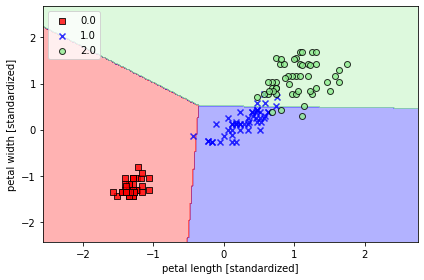

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Doğrusal Olmayan Destek Vektör Makineleri

#### Tam Ayrıştırılamayan Veriler

- Varyansın yüksek olmasını gidermek için esneme payı verilir ($\epsilon$).
- Burada kastedilen, herhangi bir i veri noktasının, karar sınırını öteki tarafında yer olmasıyla oluşan durumdur. Literatürde aynı zamanda aylak değişken (slack variable) olarak da isimlendirilir.

- Her bir i noktası için tanımlanan aylak değişkenlerin değeri $\epsilon_i \geq$ 0 olmalıdır.
- İlgili veri noktası karar sınırının diğer tarafında bulunması durumunda aylak değişken değeri $\epsilon_i$>1 olacaktır.
- Karar sınırının doğru tarafında yer alan veri noktaların aylak değişken değeri ise $\epsilon_i$ = 0 olacak.

- İkili bir durum ortaya çıkıyor. Hem karar sınırları ile destek noktaları arasındaki mesafe maksimize edilmeye çalışılıyor hem de $\epsilon_i$ değerinin minimize edilmesi amaçlanmaktadır. 
- Çelişen kısıtlar altında modelin optimize edilmesine düzenleme (regularization) denir.
- Bu çelişen durumları denge noktasında tutmak için $\lambda$ düzenleme parametresi kullanılır.
- Optimal karar sınıflarını bulmak için denklemi tekrardan düzenlersek:

$$ y_i(\beta^Tx_i + \beta_0) + \epsilon_i \geq 1 $$ 

ve 

$$ \epsilon_i \geq 0 $$

Amaç fonksiyonun minimize edilmesi:

$$ \frac{1}{2}\beta^T \beta + \lambda \sum_{i=1}^{n}\epsilon_{i} $$



- $\lambda$ parametresinin değeri "çapraz geçerlilik (cross validation)" sınaması ile belirlenebilir. 
- $\lambda$ parametresi sıfıra yaklaştığında, genişlik (margin) değeri maksimuma yaklaşır ve aylak değişkenler kısıt özelliğini yitirir (Esnemeye büyük izinler veriyor). 
- $\lambda$ parametresi büyük alınırsa genişlik aşırı düzeyde azalacak, bu durumda aylak değişkenlerin sayısı artacaktır (Esnemeye izin vermiyor).

- Bilindiği üzere **"Hard Margin Classification"** aykırı (**outlier**) verilere karşı hassastır. Bu durumda model, aykırı bir veriyle karşılaştığında doğru sınıflandırma yapamayabilir. Bu gibi problemlerin önüne geçmek için, daha esnek bir model tercih edilebilir. 

- Buradaki amaç, optimum hiper düzlemler arasındaki mesafeyi olabildiğince geniş tutarak kenar payı ihlallerini kısıtlamak arasında bir denge kurmaktır. Literatürde bu **"Soft Margin Classification"** olarak adlandırılır.

- Scikit-learn kütüphanesinde $\lambda$ parametresine karşılık kullanılan C hiper-parametresi mevcuttur. Aşağıdaki grafikte C=1 ve C=100 için elde edilen sonuçlar mevcuttur. 
- Aşağıdaki grafikte olduğu gibi C parametresi ($\lambda$) küçük alındığında (C=1) optimum hiper düzlemler arasında daha geniş bir mesafe olur ve buna bağlı olarak daha fazla sınır ihlalleri görülmektedir. Yani aylak değişken kısıtı özelliğini yitirir. Buna karşılık grafiğin C=100 sonucu incelendiğinde daha az sınır ihlali olmasına karşılık düzlemler arasındaki mesafe azalmıştır.

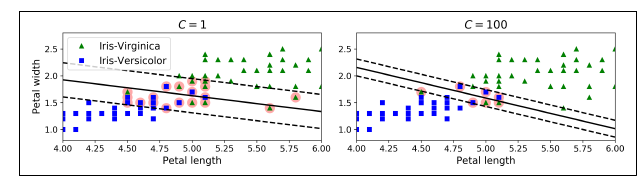

In [14]:
Image(filename='./softmargin.png', width=700)

In [15]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Sınıf bilgisi virginica olanlar 1, diğerleri 0.

In [16]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
print('Sınıf Bilgisi:', np.unique(y))

Sınıf Bilgisi: [0. 1.]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### Uygulama

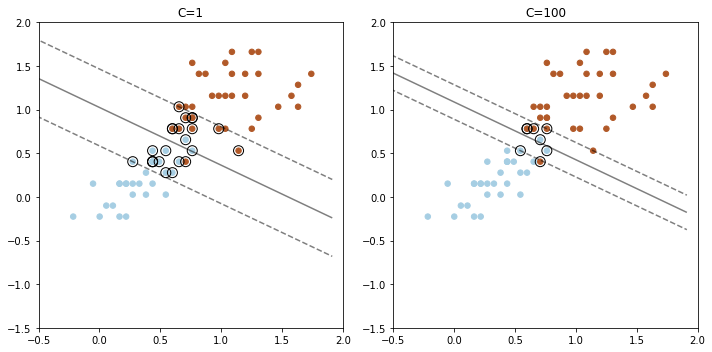

In [20]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train_std, y_train)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train_std)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
    support_vectors = X_train_std[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.axis([-0.5, 2.0, -1.5, 2.])
plt.tight_layout()
plt.show()

### Uygulama-2

In [21]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


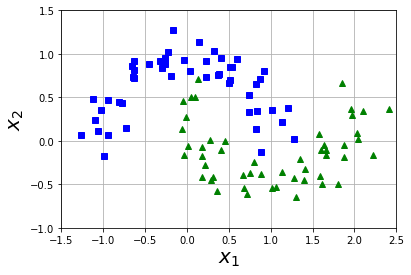

In [22]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [23]:
polynomial_svm = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_model", SVC(C=5))
    ])

polynomial_svm.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm_model', SVC(C=5))])

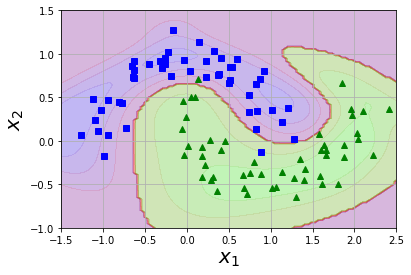

In [24]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [25]:
polynomial_10deg_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_model", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

polynomial_10deg_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_model', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

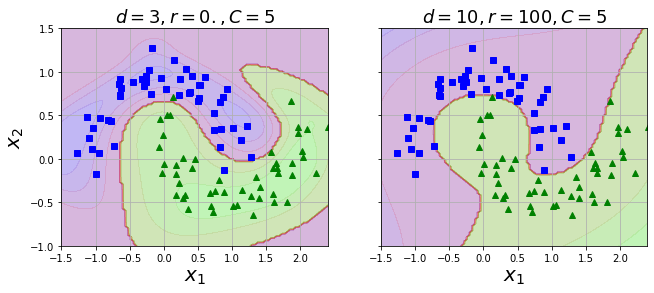

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(polynomial_svm, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=0., C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(polynomial_10deg_svm, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

### Kernel (Çekirdek) Trick

Text(0, 0.5, 'X2')

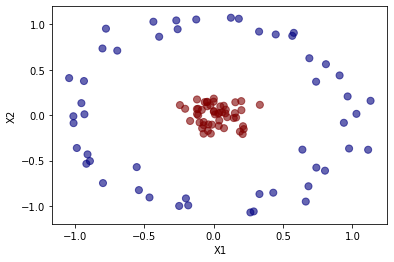

In [27]:
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.6, cmap='jet')
plt.xlabel("X1")
plt.ylabel("X2")

- Yukarıdaki şekilde görülen dağılımı doğrusal yaklaşımla ayıramazsınız.
- Bu sebeple çekirdek kavramı ortaya atılmıştır. 
- Çekirdek yaklaşımında ana fikir, verinin daha üst boyutlarda temsil edilmesidir. 
- Yukarıdaki örneği ele aldığımızda çekirdek yaklaşımını kulllanarak artık 3 boyutlu bir uzayda bu iki farklı sınıfı ayırabiliriz. Çünkü 3 boyutlu bir uzayda veri noktalarını bir düzlem ile ayırabilmek mümkün olacaktır.

In [28]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # destek vektörler
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, linewidth=1, ls="--", facecolors='none', color="k");
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [29]:
#radial basis function (RBF)
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='jet')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-45, 45], azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-45, 45), value=-45), IntSlider(value=30, descript…

In [30]:
clf = SVC(kernel='rbf', C=100)
clf.fit(X, y)

SVC(C=100)

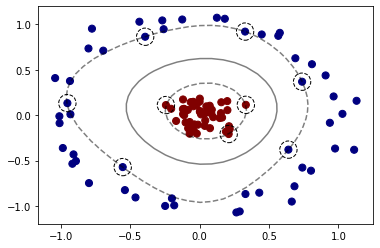

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

- Düşük boyutlarda DVM kullanılarak lineer olarak ayrılamayan veri, daha yüksek boyutlara taşınır. 
- X veri dizisini daha yüksek boyutlara taşıyacak olan fonksiyon **mapping** ($\phi$) olarak adlandırılır.
- Bu yeni özellik uzayındaki verileri sınıflandırmak için doğrusal bir DVM modeli eğitiriz.
- Mapping fonksiyonunun elemanı, yüksek boyutlu uzayda yeni koordinatların temelini oluşturucaktır.
- Bununla birlikte, mapping yaklaşımıyla ilgili bir sorunu mevcuttur. Özellikle yüksek boyutlu verilerle uğraşıyorsak, hesaplama süresi olarak daha uzun sürelere ihtiyaç vardır. Çekirdek numarası denen şey burada devreye giriyor.
- (Quadratic model ile detaylı bilgilendirme yapmasakta) $x_i^Tx_j$ iç çarpımı yerine $\phi(x_i)^T\phi(x_j)$ bu ifadeye kullanmaya başlarız.
- Yani hesaplama süresinin önüne geçmek için artık çekirdek fonksiyonunu kullanıyoruz:

    $$ K(x_i, x_j) = \phi(x_i)^T\phi(x_j)$$
    
- Farklı çekirdekler mevcut:
    - Basitçe Gauss çekirdeği olarak adlandırılabilecek Radyal Temel İşlevi (RBF-Radial Basis Function) çekirdeğidir:
    
    $$ K(x_i, x_j) = \exp^{(-\gamma(||x_i-x_j||)^2)} $$
    
$\gamma = \frac{1}{2\sigma^2}$ --> serbest parametre

### Kaynaklar:
 1. Metin Bilgin, Makine Öğrenmesi, Papatya Bilim
 2. S. İlker Birbil, Makine Öğrenmesi Ders Notları, 2018 (http://www.veridefteri.com/2018/12/13/tahmin-ve-cikarim-9-destek-vektor-makineleri/)
 3. Haldun Akpınar, DATA, Papatya Bilim
 4. Sebastian Raschka ve Vahid Mirjalili, Python Machine Learning (3rd Ed.), Packt
 5. http://scikit-learn.org/stable/modules/svm.html
 6. Kavzoğlu, T., ve Çölkesen, İ., 2010, “Destek Vektör Makineleri ile Uydu Görüntülerinin Sınıflandırılmasında Kernel Fonksiyonlarının Etkilerinin İncelenmesi”
 7. Jake VanderPlas, "Python Datascience Handbook", 2016, O'Reilly Media
 8.  A. Geron, "Hands-On Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques for Building Intelligent Systems", 2017, O'Reilly Media